In [53]:
import pandas as pd
import numpy as np

In [54]:
data=pd.read_csv('breastCancer.csv')

In [55]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [56]:
#Benign (class 2) - Not likely to get cancer
#Malignent (class 4) - Likely to get cancer

In [57]:
data.drop('id',axis=1,inplace=True)

In [58]:
data.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [59]:
#each columns reach from 1 to 10 #except class which is either 2 or 4

In [60]:
data['class'].value_counts()
#data is imbalanced

2    458
4    241
Name: class, dtype: int64

In [61]:
data.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [62]:
#bare_nucleoli is object

In [63]:
data['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [64]:
# there is ? represents nan values

In [65]:
data['bare_nucleoli'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [66]:
data['bare_nucleoli']=data['bare_nucleoli'].replace('?',np.nan)

In [67]:
data['bare_nucleoli'].isna().sum()

16

In [68]:
#there are 16 missing values

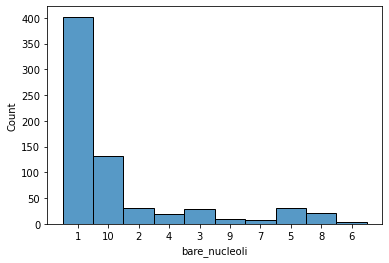

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['bare_nucleoli'])
plt.show()

In [70]:
data['bare_nucleoli'].skew()
#skewness is towards right = positive skewness

0.9900156547006164

In [71]:
data['bare_nucleoli']=data['bare_nucleoli'].replace(np.nan,'1')

In [72]:
data['bare_nucleoli']=data['bare_nucleoli'].astype(int)

### EDA

- multivariate analysis

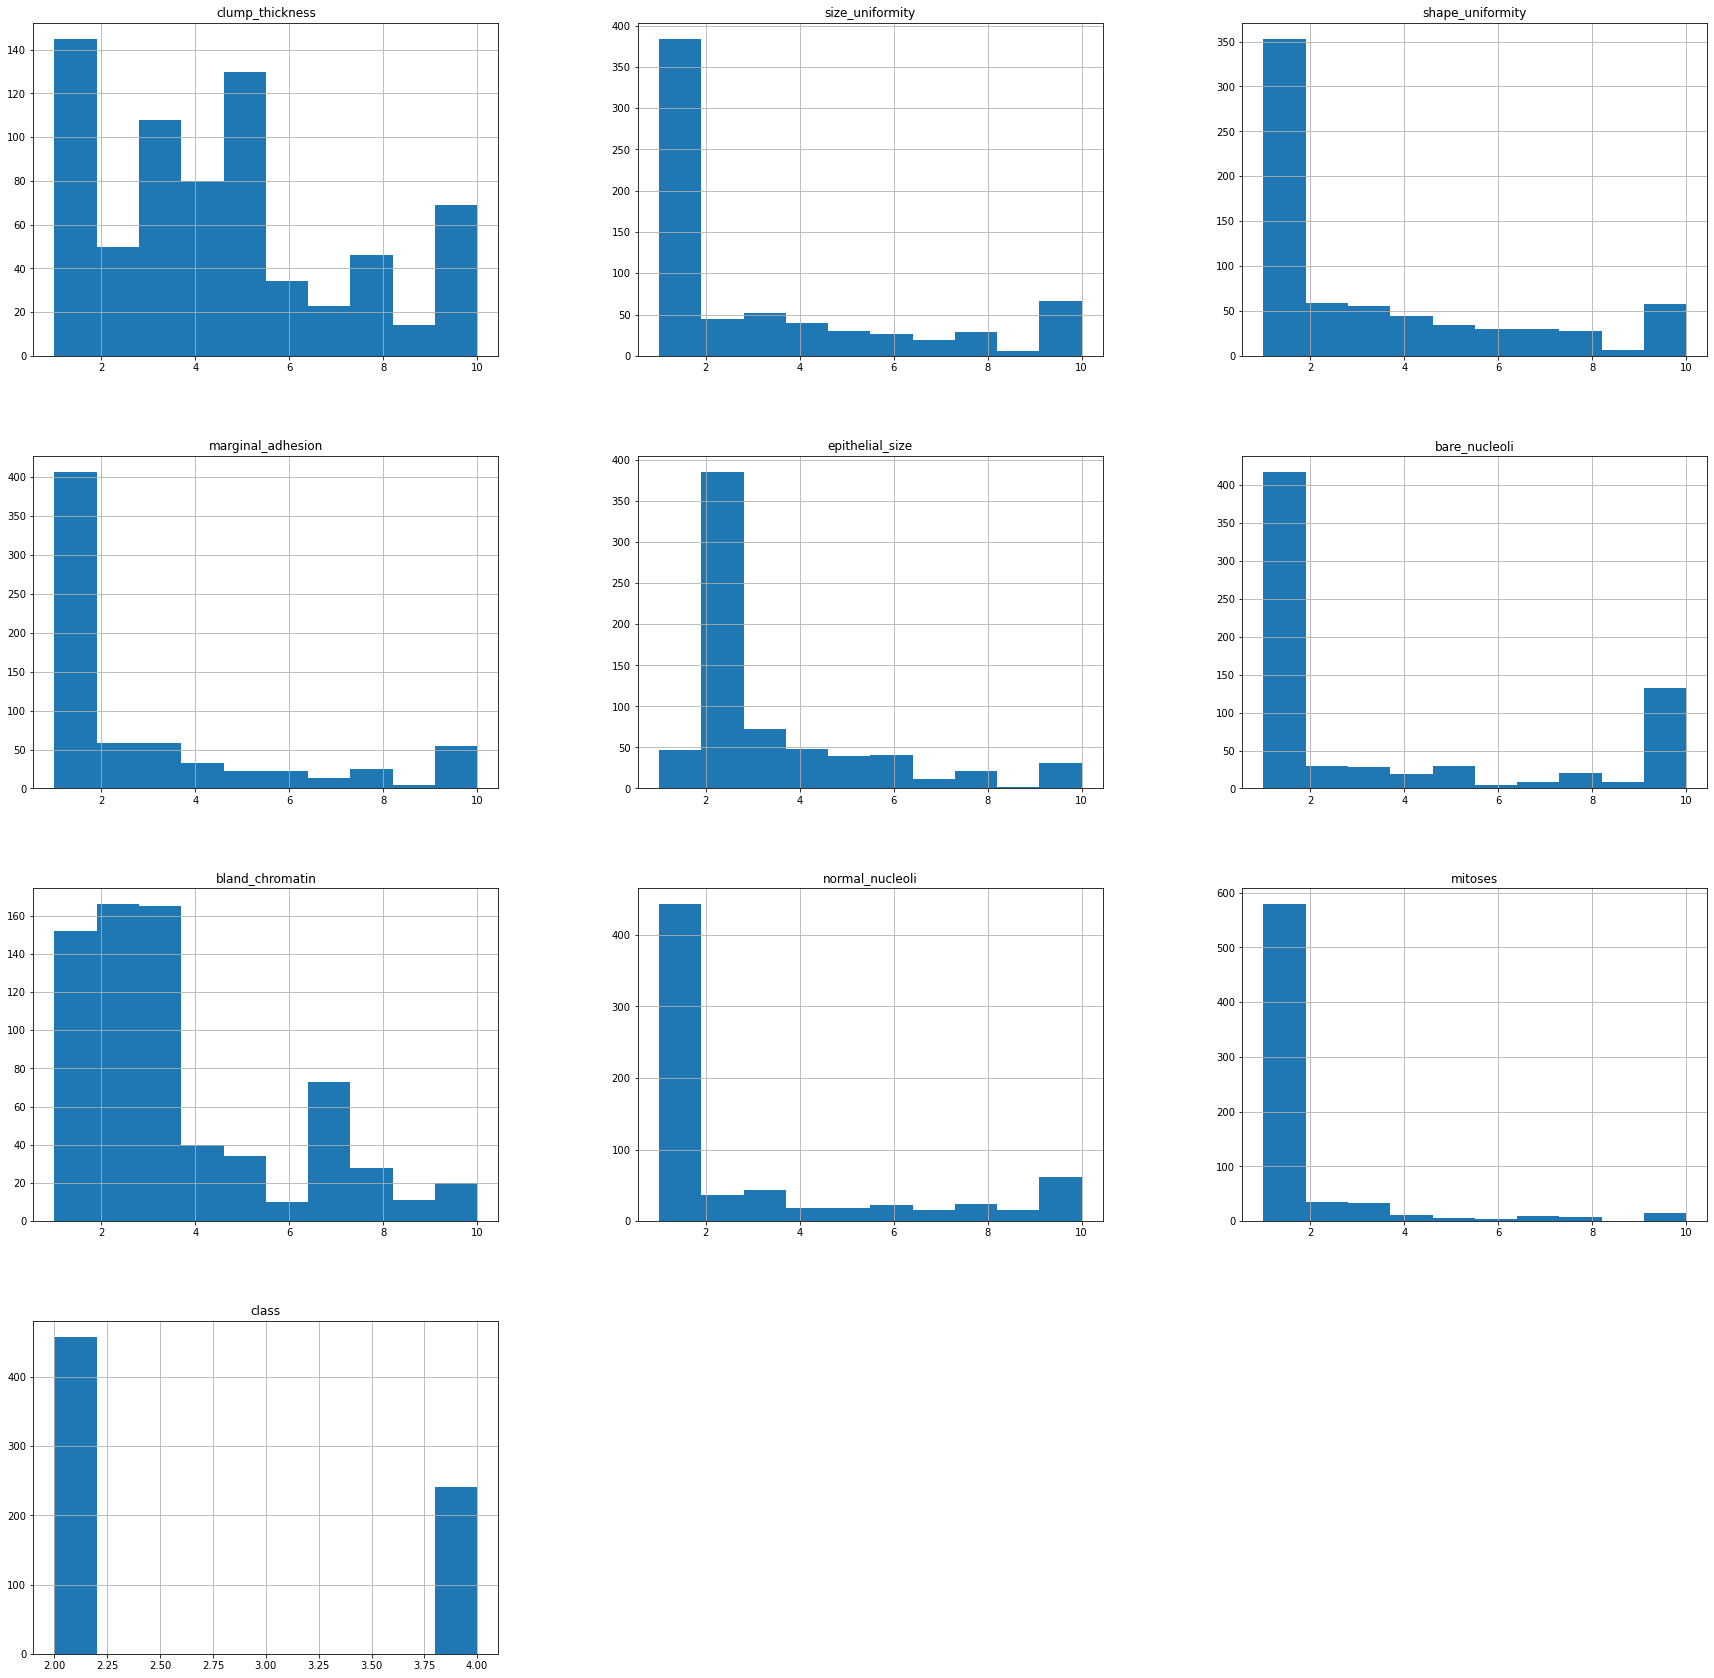

In [73]:
data.hist(figsize=(30,30))
plt.show()

In [74]:
data.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


### Multicolinearity

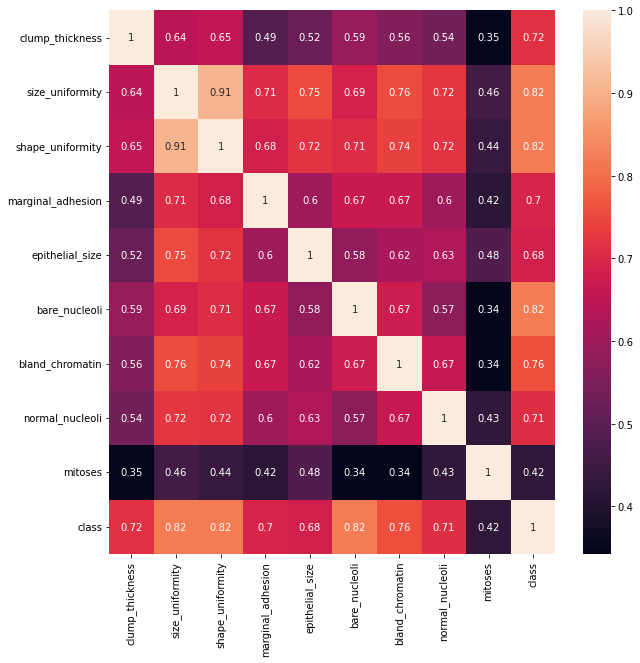

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()
#we do not need to deal with multicolinearity because its a medical record

In [76]:
x=data.drop('class',axis=1)
y=data['class']

In [77]:
from sklearn.feature_selection import SelectKBest,chi2
best=SelectKBest(score_func=chi2,k='all')
fit=best.fit(x,y)

In [78]:
score=pd.DataFrame({'Column':x.columns,'Score':fit.scores_/100})

In [79]:
#importen features are = bare_nucleoli, size_uniformity,shape_uniformity,normal_nucleoli,marginal_adhesion,clump_thickness,bland_chromatin
# features to remove= mitoses,epithelial_size

### Dealing Outliers

In [80]:
#we do not need to deal with outliears because its a medical record

In [81]:
data['marginal_adhesion'].skew()
#highly skewd

1.5244680907943355

In [82]:
#data['marginal_adhesion']=data['marginal_adhesion'].replace(data[data['marginal_adhesion']>8]['marginal_adhesion'].values,data['marginal_adhesion'].median())

### Building model

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix
kn=KNeighborsClassifier(n_neighbors=2,weights='distance')
kn.fit(x_train,y_train)
pred=kn.predict(x_test)

In [85]:
accuracy_score(y_test,pred)

0.9571428571428572

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


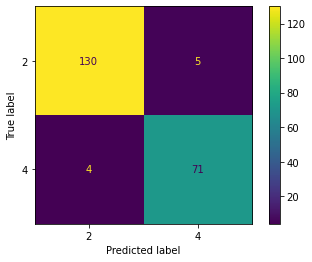

In [86]:
plot_confusion_matrix(kn, x_test, y_test)  
plt.show()

<AxesSubplot:>

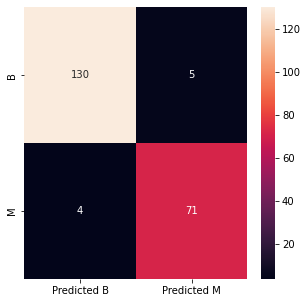

In [87]:
cm=confusion_matrix(y_test,pred,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ['B','M']],
                  columns=[i for i in ['Predicted B','Predicted M']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True,fmt='g')

- svm

In [147]:
from sklearn.svm import SVC
svc=SVC(gamma=0.025,C=2,kernel='linear')
svc.fit(x_train,y_train)

SVC(C=2, gamma=0.025, kernel='linear')

In [148]:
pred1=svc.predict(x_test)

<AxesSubplot:>

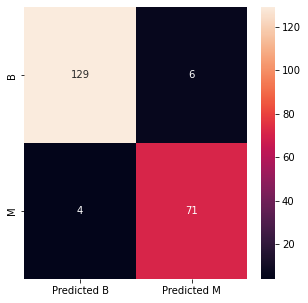

In [149]:
cm=confusion_matrix(y_test,pred1,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ['B','M']],
                  columns=[i for i in ['Predicted B','Predicted M']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [150]:
# we want to predict class M - likely to get cancer
#but only 71 are predicted till now because of imbalanced dataset

In [151]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [152]:
#pip install imbalanced-learn

In [153]:
from imblearn.over_sampling import SMOTE

In [154]:
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)

In [156]:
# x_train_sm11=pd.DataFrame(x_train_sm1,columns=x_train_sm.columns)

In [157]:
# x_test11=pd.DataFrame(x_test1,columns=x_test.columns)

In [173]:
kn1=KNeighborsClassifier(n_neighbors=2,weights='distance')
kn1.fit(x_train_sm,y_train_sm)
pred3=kn.predict(x_test)

<AxesSubplot:>

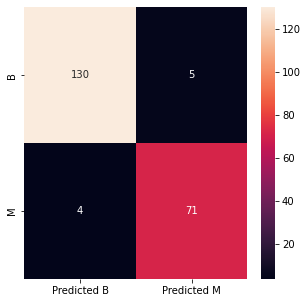

In [174]:
cm=confusion_matrix(y_test,pred3,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ['B','M']],
                  columns=[i for i in ['Predicted B','Predicted M']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [168]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sm1=scaler.fit_transform(x_train_sm)
x_test1=scaler.fit_transform(x_test)
pickle.dump(scaler,open('scaler.pkl','wb'))

<AxesSubplot:>

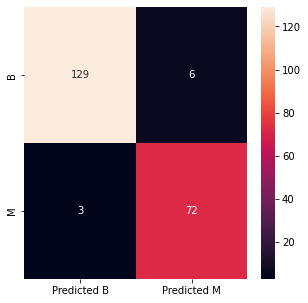

In [180]:
from sklearn.svm import SVC
svc=SVC(gamma=0.075,C=4,kernel='linear',probability=True)
svc.fit(x_train_sm,y_train_sm)
pred1=svc.predict(x_test)

cm=confusion_matrix(y_test,pred1,labels=[2,4])
df_cm=pd.DataFrame(cm,index=[i for i in ['B','M']],
                  columns=[i for i in ['Predicted B','Predicted M']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [181]:
import pickle
pickle.dump(svc,open('model.pkl','wb'))